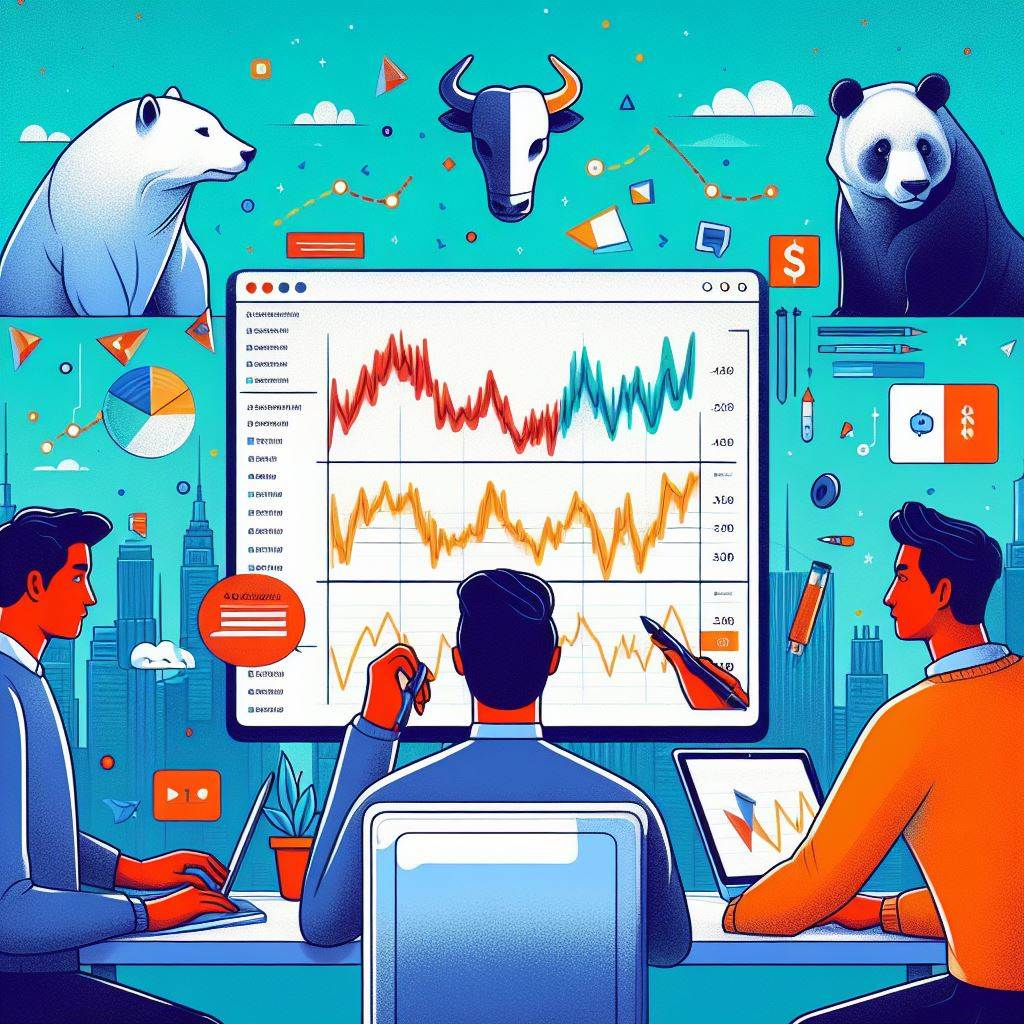

<b> Prepared by: </b>

Reginald Christian V. Gonzales\
BS in Data Science\
Mapua University\
2024-03-30\
\
<b>Data Source:</b>
https://finance.yahoo.com/quote/PSEI.PS/history


***

<b> Project Overview

In this project, we aim to build a simple machine learning model to predict the price of the Philippine Stock Exchange Index (PSEI) stock market index. We will use historical data and basic machine learning techniques to create our model.

***

<b>Project Steps:</b>

1. Download data using the yfinance package
2. Create an initial machine learning model and estimate accuracy
3. Build a backtesting engine to more accurately measure accuracy
4. Improve the accuracy of the model



***

<b> Modules Imported

***

In [4]:
import yfinance as yf
import pandas as pd
import os

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score

***

In [5]:
psei = yf.Ticker("PSEI.PS")

In [6]:
psei = psei.history(period="max")

In [7]:
psei

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1987-01-02 00:00:00+08:00,439.416992,439.416992,439.416992,439.416992,0,0.0,0.0
1987-01-05 00:00:00+08:00,455.112976,455.112976,455.112976,455.112976,0,0.0,0.0
1987-01-06 00:00:00+08:00,462.141174,462.141174,462.141174,462.141174,0,0.0,0.0
1987-01-07 00:00:00+08:00,462.381104,462.381104,462.381104,462.381104,0,0.0,0.0
1987-01-08 00:00:00+08:00,482.895813,482.895813,482.895813,482.895813,0,0.0,0.0
...,...,...,...,...,...,...,...
2024-03-22 00:00:00+08:00,6917.680176,6919.759766,6871.450195,6881.970215,98100,0.0,0.0
2024-03-25 00:00:00+08:00,6879.750000,6886.529785,6843.500000,6853.100098,95500,0.0,0.0
2024-03-26 00:00:00+08:00,6840.850098,6898.169922,6797.649902,6898.169922,92100,0.0,0.0


In [8]:
psei.index

DatetimeIndex(['1987-01-02 00:00:00+08:00', '1987-01-05 00:00:00+08:00',
               '1987-01-06 00:00:00+08:00', '1987-01-07 00:00:00+08:00',
               '1987-01-08 00:00:00+08:00', '1987-01-09 00:00:00+08:00',
               '1987-01-12 00:00:00+08:00', '1987-01-13 00:00:00+08:00',
               '1987-01-14 00:00:00+08:00', '1987-01-15 00:00:00+08:00',
               ...
               '2024-03-15 00:00:00+08:00', '2024-03-18 00:00:00+08:00',
               '2024-03-19 00:00:00+08:00', '2024-03-20 00:00:00+08:00',
               '2024-03-21 00:00:00+08:00', '2024-03-22 00:00:00+08:00',
               '2024-03-25 00:00:00+08:00', '2024-03-26 00:00:00+08:00',
               '2024-03-27 00:00:00+08:00', '2024-04-01 00:00:00+08:00'],
              dtype='datetime64[ns, Asia/Manila]', name='Date', length=9372, freq=None)

<b> Data Cleaning and Visualizing the Stock Market Data </b>

***

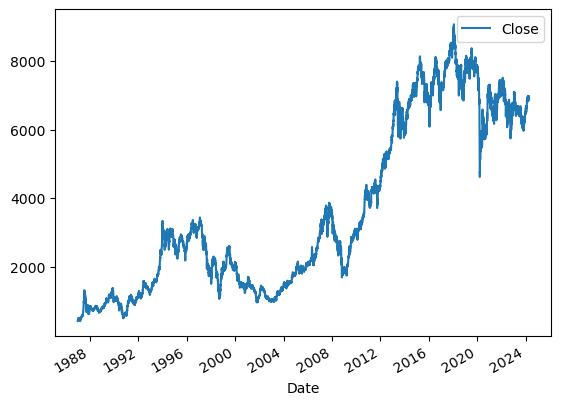

In [9]:
psei.plot.line(y="Close", use_index="True");

In [10]:
del psei["Dividends"]
del psei["Stock Splits"]

In [11]:
psei["Tomorrow"] = psei["Close"].shift(-1)

In [12]:
psei

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1987-01-02 00:00:00+08:00,439.416992,439.416992,439.416992,439.416992,0,455.112976
1987-01-05 00:00:00+08:00,455.112976,455.112976,455.112976,455.112976,0,462.141174
1987-01-06 00:00:00+08:00,462.141174,462.141174,462.141174,462.141174,0,462.381104
1987-01-07 00:00:00+08:00,462.381104,462.381104,462.381104,462.381104,0,482.895813
1987-01-08 00:00:00+08:00,482.895813,482.895813,482.895813,482.895813,0,503.400543
...,...,...,...,...,...,...
2024-03-22 00:00:00+08:00,6917.680176,6919.759766,6871.450195,6881.970215,98100,6853.100098
2024-03-25 00:00:00+08:00,6879.750000,6886.529785,6843.500000,6853.100098,95500,6898.169922
2024-03-26 00:00:00+08:00,6840.850098,6898.169922,6797.649902,6898.169922,92100,6903.529785


In [13]:
psei["Target"] = (psei["Tomorrow"] > psei["Close"]).astype(int)

In [14]:
psei = psei.loc["1990-01-01":].copy()

In [15]:
psei

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02 00:00:00+08:00,1120.471924,1120.471924,1120.471924,1120.471924,0,1114.453369,0
1990-01-03 00:00:00+08:00,1114.453369,1114.453369,1114.453369,1114.453369,0,1128.959717,1
1990-01-04 00:00:00+08:00,1128.959717,1128.959717,1128.959717,1128.959717,0,1128.319824,0
1990-01-05 00:00:00+08:00,1128.319824,1128.319824,1128.319824,1128.319824,0,1131.079102,1
1990-01-08 00:00:00+08:00,1131.079102,1131.079102,1131.079102,1131.079102,0,1123.871094,0
...,...,...,...,...,...,...,...
2024-03-22 00:00:00+08:00,6917.680176,6919.759766,6871.450195,6881.970215,98100,6853.100098,0
2024-03-25 00:00:00+08:00,6879.750000,6886.529785,6843.500000,6853.100098,95500,6898.169922,1
2024-03-26 00:00:00+08:00,6840.850098,6898.169922,6797.649902,6898.169922,92100,6903.529785,1


<b> Training an Initial ML Model </b>

***

In [16]:
model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)

train = psei.iloc[:-100]
test = psei.iloc[-100:]

predictors = ["Close", "Volume", "Open", "High", "Low"]
model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [17]:
preds = model.predict(test[predictors])
preds = pd.Series(preds, index=test.index)
precision_score(test["Target"], preds)

0.5666666666666667

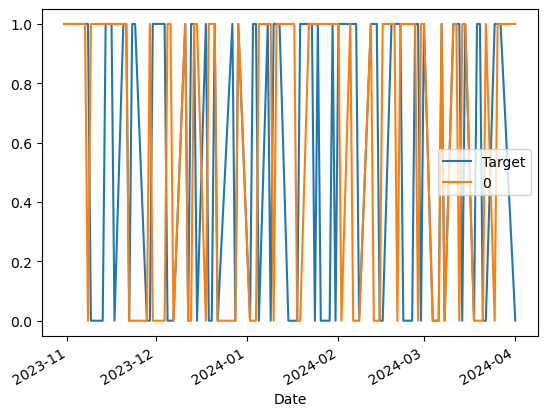

In [18]:
combined = pd.concat([test["Target"], preds], axis=1)
combined.plot();

<b> Building a Backtesting System </b>

***

In [19]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [20]:
def backtest(data, model, predictors, start=2500, step=250):
    all_predictions = []

    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    
    return pd.concat(all_predictions)

In [21]:
predictions = backtest(psei, model, predictors)

In [22]:
predictions["Predictions"].value_counts()

0    3384
1    2712
Name: Predictions, dtype: int64

In [23]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5228613569321534

In [24]:
predictions["Target"].value_counts() / predictions.shape[0]

1    0.505906
0    0.494094
Name: Target, dtype: float64

In [25]:
horizons = [2,5,60,250,1000]
new_predictors = []

for horizon in horizons:
    rolling_averages = psei.rolling(horizon).mean()
    
    ratio_column = f"Close_Ratio_{horizon}"
    psei[ratio_column] = psei["Close"] / rolling_averages["Close"]
    
    trend_column = f"Trend_{horizon}"
    psei[trend_column] = psei.shift(1).rolling(horizon).sum()["Target"]
    
    new_predictors+= [ratio_column, trend_column]

In [26]:
psei = psei.dropna(subset=psei.columns[psei.columns != "Tomorrow"])

In [27]:
psei

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1993-11-17 00:00:00+08:00,2446.960938,2446.960938,2446.960938,2446.960938,0,2439.112793,0,1.000740,2.0,1.009524,4.0,1.155015,38.0,1.468095,142.0,2.018519,501.0
1993-11-18 00:00:00+08:00,2439.112793,2439.112793,2439.112793,2439.112793,0,2440.002441,1,0.998394,1.0,1.004021,3.0,1.145460,38.0,1.459315,141.0,2.009848,501.0
1993-11-19 00:00:00+08:00,2440.002441,2440.002441,2440.002441,2440.002441,0,2454.548828,1,1.000182,1.0,1.001348,4.0,1.140074,39.0,1.455794,142.0,2.008412,501.0
1993-11-22 00:00:00+08:00,2454.548828,2454.548828,2454.548828,2454.548828,0,2415.739014,0,1.002972,2.0,1.003990,4.0,1.141035,39.0,1.460384,142.0,2.018182,502.0
1993-11-23 00:00:00+08:00,2415.739014,2415.739014,2415.739014,2415.739014,0,2409.820312,0,0.992031,1.0,0.990352,3.0,1.117693,38.0,1.433450,141.0,1.984176,501.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-22 00:00:00+08:00,6917.680176,6919.759766,6871.450195,6881.970215,98100,6853.100098,0,0.994132,1.0,1.000179,3.0,1.018647,35.0,1.061796,131.0,1.048072,522.0
2024-03-25 00:00:00+08:00,6879.750000,6886.529785,6843.500000,6853.100098,95500,6898.169922,1,0.997898,0.0,0.995989,2.0,1.013539,34.0,1.057049,131.0,1.043684,522.0
2024-03-26 00:00:00+08:00,6840.850098,6898.169922,6797.649902,6898.169922,92100,6903.529785,1,1.003278,1.0,1.001092,3.0,1.019079,35.0,1.063720,131.0,1.050559,522.0


In [28]:
model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)

In [29]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict_proba(test[predictors])[:,1]
    preds[preds >=.6] = 1
    preds[preds <.6] = 0
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [30]:
predictions = backtest(psei, model, new_predictors)

In [31]:
predictions["Predictions"].value_counts()

0.0    4563
1.0     533
Name: Predictions, dtype: int64

In [32]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5891181988742964

In [33]:
predictions["Target"].value_counts() / predictions.shape[0]

1    0.519035
0    0.480965
Name: Target, dtype: float64

In [34]:
predictions

,Target,Predictions
Date,,
2003-07-25 00:00:00+08:00,0,0.0
2003-07-28 00:00:00+08:00,0,0.0
2003-07-29 00:00:00+08:00,1,0.0
2003-07-30 00:00:00+08:00,1,0.0
2003-07-31 00:00:00+08:00,0,0.0
...,...,...
2024-03-22 00:00:00+08:00,0,0.0
2024-03-25 00:00:00+08:00,1,0.0
2024-03-26 00:00:00+08:00,1,0.0
